## Model Debugging

Topics:
- Error Analysis
- Confusion Matrix
- Bias-Variance Checks

In [1]:
# Data handling and Visualization
import pandas as pd
import matplotlib.pyplot as plt

# Model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
# Creating a simple dataset
!gdown 1qXoDeYVC4vhd7xTNwohxh9dMCjjtoHoJ
df = pd.read_csv('cars24-car-price-cleaned-new.csv')
df.head()

Downloading...
From: https://drive.google.com/uc?id=1qXoDeYVC4vhd7xTNwohxh9dMCjjtoHoJ
To: c:\Users\HARSH\OneDrive\Desktop\aiml-daily-practice\notebooks\cars24-car-price-cleaned-new.csv

  0%|          | 0.00/1.55M [00:00<?, ?B/s]
 34%|███▍      | 524k/1.55M [00:00<00:01, 956kB/s]
100%|██████████| 1.55M/1.55M [00:00<00:00, 2.13MB/s]
100%|██████████| 1.55M/1.55M [00:00<00:00, 1.89MB/s]


,selling_price,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [3]:
df['model'].nunique(), df['make'].nunique()

(3233, 41)

In [4]:
df['make'] = df.groupby('make')['selling_price'].transform('mean')
df['model'] = df.groupby('model')['selling_price'].transform('mean')
df.head()

,selling_price,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,selling_price,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.043684,0.031553,0.135345,0.117891,0.066506,0.310345,0.194048,0.041550,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.252397,0.005237,0.128448,0.177281,0.123994,0.172414,0.232517,0.218382,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.089795,0.015764,0.112069,0.177281,0.120773,0.379310,0.232517,0.149143,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.095134,0.009711,0.145862,0.147808,0.100000,0.310345,0.194048,0.093193,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.262104,0.007869,0.161810,0.221860,0.150709,0.206897,0.252367,0.313574,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [6]:
from sklearn.model_selection import train_test_split

df1 = pd.read_csv('cars24-car-price-cleaned-new.csv')
df_train, df_test = train_test_split(df1, test_size=0.3, random_state=1)

In [7]:
df_train.shape,df_test.shape

((13874, 17), (5946, 17))

In [8]:
make_category_wise_mean = df_train.groupby('make')['selling_price'].mean()
model_category_wise_mean = df_train.groupby('model')['selling_price'].mean()

make_category_wise_mean,model_category_wise_mean

(make
 AMBASSADOR        1.452500
 AUDI             17.177207
 BENTLEY          20.902500
 BMW              17.124458
 CHEVROLET         2.601774
 DATSUN            3.132797
 DC               11.925000
 FERRARI          20.902500
 FIAT              3.146282
 FORCE             5.600000
 FORD              5.887344
 HONDA             5.949517
 HYUNDAI           5.437345
 ISUZU            14.037708
 JAGUAR           20.254687
 JEEP             16.123966
 KIA              15.396905
 LAMBORGHINI      20.902500
 LAND             20.356875
 LEXUS            20.902500
 MAHINDRA          7.320377
 MARUTI            4.683960
 MASERATI         20.902500
 MERCEDES-BENZ    17.028438
 MG               17.475333
 MINI             19.024833
 MITSUBISHI        8.632121
 NISSAN            4.642876
 OPEL              1.500000
 OPELCORSA         1.516667
 PORSCHE          20.902500
 RENAULT           4.644698
 ROLLS-ROYCE      20.902500
 SKODA             7.405949
 TATA              4.368078
 TOYOTA       

In [9]:
df_train['make'] = df_train.groupby('make')['selling_price'].transform('mean')
df_train['model'] = df_train.groupby('model')['selling_price'].transform('mean')

In [10]:
df_test['make'] = df_test['make'].map(make_category_wise_mean)
df_test['model'] = df_test['model'].map(model_category_wise_mean)

df_test

,selling_price,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
14690,1.35,70000,17.00,1086.0,5.0,14.0,5.437345,NaN,1,0,0,0,0,0,1,1,0
134,4.15,58000,25.20,1248.0,74.0,8.0,4.683960,4.699310,0,0,1,0,0,0,1,1,0
4982,4.90,50000,25.32,1198.0,77.0,6.0,7.320377,6.000000,0,0,1,0,0,0,1,0,1
11940,3.31,72000,16.80,1497.0,118.0,13.0,5.949517,3.530000,0,0,0,0,0,1,0,1,0
10861,5.80,70000,26.59,1248.0,74.0,8.0,4.683960,5.261472,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10638,6.50,54000,25.80,1498.0,98.6,5.0,5.949517,4.120000,0,0,1,0,0,0,1,1,0
74,4.25,58000,14.53,1794.0,138.1,14.0,10.442393,8.004444,0,0,0,0,0,1,0,1,0
18009,2.25,50000,18.00,995.0,62.0,11.0,2.601774,1.278889,0,0,0,0,0,1,1,1,0
19144,4.00,80000,16.80,1497.0,118.0,13.0,5.949517,3.225000,1,0,0,0,0,1,0,1,0


In [11]:
df_test.isna().sum()

selling_price         0
km_driven             0
mileage               0
engine                0
max_power             0
age                   0
make                  5
model               468
Individual            0
Trustmark Dealer      0
Diesel                0
Electric              0
LPG                   0
Petrol                0
Manual                0
5                     0
>5                    0
dtype: int64

In [12]:
global_mean = df_train['selling_price'].mean()

In [13]:
df_test['make'] = df_test['make'].fillna(global_mean)
df_test['model'] = df_test['model'].fillna(global_mean)

In [14]:
df_test.isna().sum()

selling_price       0
km_driven           0
mileage             0
engine              0
max_power           0
age                 0
make                0
model               0
Individual          0
Trustmark Dealer    0
Diesel              0
Electric            0
LPG                 0
Petrol              0
Manual              0
5                   0
>5                  0
dtype: int64

In [15]:
df_test

,selling_price,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
14690,1.35,70000,17.00,1086.0,5.0,14.0,5.437345,6.566364,1,0,0,0,0,0,1,1,0
134,4.15,58000,25.20,1248.0,74.0,8.0,4.683960,4.699310,0,0,1,0,0,0,1,1,0
4982,4.90,50000,25.32,1198.0,77.0,6.0,7.320377,6.000000,0,0,1,0,0,0,1,0,1
11940,3.31,72000,16.80,1497.0,118.0,13.0,5.949517,3.530000,0,0,0,0,0,1,0,1,0
10861,5.80,70000,26.59,1248.0,74.0,8.0,4.683960,5.261472,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10638,6.50,54000,25.80,1498.0,98.6,5.0,5.949517,4.120000,0,0,1,0,0,0,1,1,0
74,4.25,58000,14.53,1794.0,138.1,14.0,10.442393,8.004444,0,0,0,0,0,1,0,1,0
18009,2.25,50000,18.00,995.0,62.0,11.0,2.601774,1.278889,0,0,0,0,0,1,1,1,0
19144,4.00,80000,16.80,1497.0,118.0,13.0,5.949517,3.225000,1,0,0,0,0,1,0,1,0


In [16]:
scaler = MinMaxScaler()

df_train = pd.DataFrame(scaler.fit_transform(df_train), columns=df.columns)

df_test = pd.DataFrame(scaler.transform(df_test), columns=df.columns)

In [17]:
y_train = df_train['selling_price']
X_train = df_train.drop('selling_price',axis = 1)

y_train.shape,X_train.shape

((13874,), (13874, 16))

In [18]:
y_test = df_test['selling_price']
X_test = df_test.drop('selling_price', axis=1)
y_test.shape, X_test.shape

((5946,), (5946, 16))

In [19]:
#linear regression with single I/O

X1_train = X_train[['model']]
X1_test = X_test[['model']]
X1_test

,model
0,0.303310
1,0.212577
2,0.275787
3,0.155753
4,0.239897
...,...
5941,0.184425
5942,0.373196
5943,0.046356
5944,0.140931


In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X1_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [21]:
model.coef_

array([0.99878656])

In [22]:
model.intercept_

np.float64(0.0012134449702719263)

In [23]:
y_hat = model.predict(X1_test[['model']])

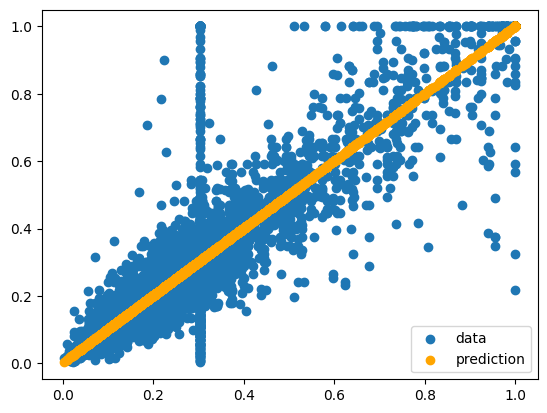

In [24]:
fig = plt.figure()
plt.scatter(X_test[['model']],y_test,label='data')
plt.scatter(X_test[['model']],y_hat,color='orange',label='prediction')
plt.legend()
plt.show()

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [26]:
model.coef_

array([-0.22864076, -0.22718566,  0.06493271,  0.04101896, -0.20803904,
        0.06292526,  0.8680704 , -0.00692582, -0.00676553,  0.00537632,
        0.13338991,  0.01451176, -0.00704768, -0.0039257 , -0.01313206,
       -0.02020274])

In [27]:
model.intercept_

np.float64(0.11212257190753955)

In [28]:
X_train.to_pickle('cars24_x_train.pkl')

C:\Users\HARSH\AppData\Local\Temp\ipykernel_16120\3460801824.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


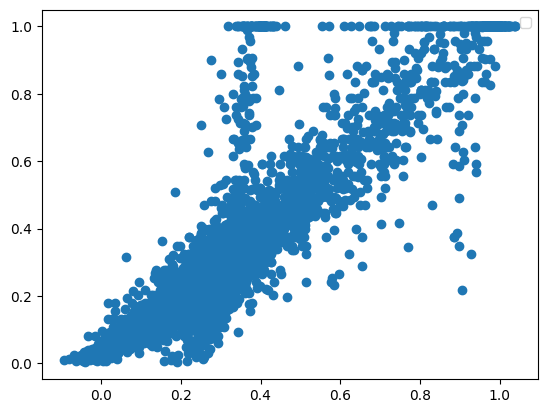

In [29]:
#homework
fig = plt.figure()
y_hat = model.predict(X_test)
plt.scatter(y_hat,y_test)
plt.legend()
plt.show()

In [30]:
!gdown 1dw56R8SzKgTgiKurfBLUTxmiewJacMkt

Downloading...
From: https://drive.google.com/uc?id=1dw56R8SzKgTgiKurfBLUTxmiewJacMkt
To: c:\Users\HARSH\OneDrive\Desktop\aiml-daily-practice\notebooks\Spam_finalData.csv

  0%|          | 0.00/1.64M [00:00<?, ?B/s]
 32%|███▏      | 524k/1.64M [00:00<00:01, 748kB/s]
 64%|██████▍   | 1.05M/1.64M [00:01<00:00, 978kB/s]
 96%|█████████▌| 1.57M/1.64M [00:01<00:00, 1.10MB/s]
100%|██████████| 1.64M/1.64M [00:01<00:00, 1.06MB/s]


In [31]:
!gdown 1CgBW5H54YfdYtJmYE5GWctaHZSpFt71V

Downloading...
From: https://drive.google.com/uc?id=1CgBW5H54YfdYtJmYE5GWctaHZSpFt71V
To: c:\Users\HARSH\OneDrive\Desktop\aiml-daily-practice\notebooks\spam_ham_dataset.csv

  0%|          | 0.00/5.50M [00:00<?, ?B/s]
 10%|▉         | 524k/5.50M [00:00<00:08, 590kB/s]
 19%|█▉        | 1.05M/5.50M [00:01<00:06, 701kB/s]
 29%|██▊       | 1.57M/5.50M [00:02<00:05, 711kB/s]
 38%|███▊      | 2.10M/5.50M [00:02<00:04, 731kB/s]
 48%|████▊     | 2.62M/5.50M [00:03<00:03, 790kB/s]
 57%|█████▋    | 3.15M/5.50M [00:04<00:03, 749kB/s]
 67%|██████▋   | 3.67M/5.50M [00:05<00:02, 741kB/s]
 76%|███████▌  | 4.19M/5.50M [00:05<00:01, 869kB/s]
 86%|████████▌ | 4.72M/5.50M [00:05<00:00, 1.06MB/s]
 95%|█████████▌| 5.24M/5.50M [00:06<00:00, 1.14MB/s]
100%|██████████| 5.50M/5.50M [00:06<00:00, 1.24MB/s]
100%|██████████| 5.50M/5.50M [00:06<00:00, 894kB/s] 


In [32]:
demo1 = pd.read_csv('spam_ham_dataset.csv')
demo1.drop(['Unnamed: 0','label'],axis=1,inplace=True)
demo1.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [33]:
dt = pd.read_csv('Spam_finalData.csv')

In [34]:
dt.head()

,label_num,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14
0,0,-0.031489,-0.003323,-0.071238,0.047743,0.060798,0.046597,-0.069530,-0.000031,-0.037924,0.024059,-0.015085,-0.007752,-0.021617,-0.025395,0.046050
1,0,-0.122601,0.114176,0.460451,0.000953,0.014707,0.007610,-0.011173,-0.052478,0.040209,0.000076,0.010306,0.023397,-0.007294,0.063543,0.081119
2,0,-0.076681,-0.084330,-0.054658,-0.048236,-0.019999,-0.045909,-0.004712,-0.001524,0.013735,-0.022429,0.010273,-0.007458,-0.044340,-0.051093,0.025553
3,1,-0.075948,-0.059706,-0.025301,-0.037603,-0.001208,-0.030660,0.018873,-0.013434,-0.014981,0.000741,0.005653,0.032153,0.001884,-0.018005,-0.011060
4,0,-0.054680,0.033033,-0.090885,-0.047280,-0.029304,0.085893,-0.105351,-0.053915,-0.006857,0.021673,0.056718,0.006140,0.042217,0.018862,-0.007373


In [35]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(dt.drop(['label_num'],axis=1),dt['label_num'])

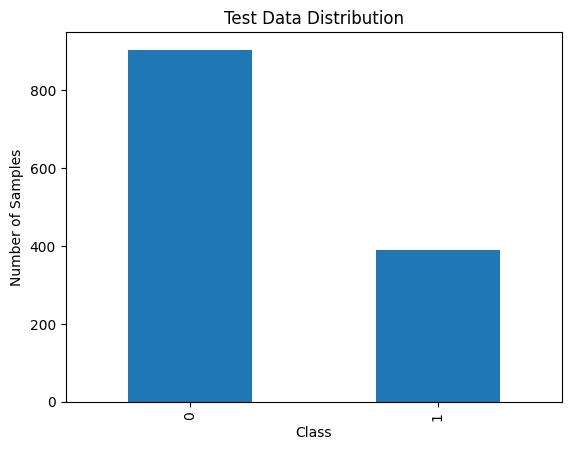

In [36]:
y_test.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Test Data Distribution')
plt.show()

In [37]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(X_train,y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [38]:
print('Model Accuracy:',model.score(X_test,y_test))

Model Accuracy: 0.9218870843000774
